# Exercises 6: Ising Model

The purpose of this exercise is improving a given code of the (1D) Ising Model of Statistic Mechanics. The code computes the next configuration of the system while evaluating the characteristic macroscopic observables. We are asked to implement both Metropolis and Gibbs algorithm to sample the <i> next move</i> and to add the possibility to calculate the <i> heat capacity </i> $C(N,T, h=0)$, the <i> magnetic susceptibility</i> $\chi(N,T, h=0)$ and the <i> magnetisation</i> $M(N,T,h \neq 0)$.

### a) The model
The Ising Model is one of the most interesting model in Statistical Mechanics: it idealizes a **magnet** as a lattice with one particle at each site characterized only by its spin <i> up </i> or <i> down </i>. This simple idea gives the possibility to evaluate the characteristic macroscopic properties analytically (only in 1D and 2D) and to lead to important results and consequences.

A simple form of the hamiltonian in 1D is: 

$$ H = -J\sum_{i=1}^N s_i s_{i+1}-\frac{h}{2}\sum_{i=1}^N (s_i + s_{i+1}) $$

where $\{ s_i \}_{i=1,N}$ are spin variables taking values in $\{-1;1\}$ and $J$ is the <i>exchange interaction</i> in the ferromagnetic model ($J>0$). The first term represents the interaction between two neighbour spins ($J$ depends on the intrinsic properties of the system) while the second one shows the effect of the external field $h$ on the system. In order to implement this model, we also suppose working with a dimensionless problem ($\mu_B=1$ and $k_B=1$) and in <i> Periodic Boundary Contitions </i> ($s_{N+1} = s_{1}$).

### b) Metropolis algorithm
The complete algrithm is explained in the previous Jupyter Notebook, what we now question is which is the pdf $p(x)$ to sample.
Since the system follow the Maxwell-Boltzmann statistics, the probability to be in a generic state (i.e. spin configuration) $\mu$ is:

$$ p(\mu)= \frac{e^{-\beta \ E_\mu}}{Z}$$

where $Z$ is the <i>partition function</i>: $Z=\sum_{\{\mu \}}e^{-\beta \ E_\mu}$, introduced for the probability normalisation. Note that this is a sum of $2^N$ terms (i.e. total number of possible configurations of the system), that can be a demanding calculation and often impossible.
The big advantage of the Metropolis algorithm is that it does not need any normalisation of the probability, so that we can overcome this problem, considering $p(\mu)\ "=" \ e^{-\beta \ E_\mu}$.

Considering the (symmetric) transition probability <span style="color:forestgreen">**$T(\nu|\mu)$**</span> as the <span style="color:forestgreen">filp of just one (randomly selected) spin $s_j$</span> from the previous configuration, the acceptance rate results to be:

$$ A(\nu|\mu)=min \left [1, \frac{p(\nu)}{p(\mu)} \right ]=min \left [1, e^{-\beta \ (E_\nu - E_\mu)} \right ]$$

In order to evaluate the energy difference bwtween the two states, we consider just the sum contributions dependent on the flipped spin $s_j$ (i.e. $s_j$, $s_{j+1}$ ans $s_{j-1}$) and for $T(\nu|\mu)$, $\ \ \ s_j^\nu=- s_j^\mu \ \ \ $, so that $E_\nu - E_\mu = 2s_j [J(s_{j-1} + s_{j+1}) + h]$.

### c) Gibbs algorithm
It is the simplest Markov chain sampling method. The idea is based on choosing a specific transition probability $T(y|x)$ to sample the next move: sweeping through each variable $x_k$, $T_k(y|x)$ draws a new step $x_k \rightarrow y_k$ from its conditional distribution with the remaining variables $x_{i \neq k}$ fixed to their current values.

So the algorithm with for instance three variables $(x_1,x_2,x_3)$ results to be:

0. <i>Initialization</i>: choose the starting point $x_i=x_i^0$  for $i=1,2,3$.
1. Iterate $t=1,2....,M$ times:
    - Keeping fixed $x_2^t$ and $x_3^t$, sample $x_1^{t+1}$ from $p_{1|2}=(x_1|x_2^t, x_3^t)$;
    - Generate $x_2^{t+1}$ and $x_3^{t+1}$ sampling from their condition probabilities keeping the other two variables fixed;
    - Finally obtaining the next move $(x_1^{t+1},x_2^{t+1},x_3^{t+1})$.

In other words, we can considered Gibbs algorithm as the Metropolis method with moves always accepted just by choosing a particular transition probability ($A(y|x)=1$ and $K(y|x)=T(y|x)$).

This method is well applicable to the Ising model: visiting a (randomly selected) $s_j$, its new value is chosen **indipendently from its actual value** and the transition probability is:
$$T(\nu|\mu)= \frac{p(s_j'= \pm 1)}{p(s_j=+1)+p(s_j=-1)}$$

where the probabilities are nothing but the Boltzmann weight previously, so that a new form of the transition probability is: 
<span style="color:forestgreen">$$ T(\nu|\mu)=\frac{1}{1+ \text{exp}\left(\mp \ 2 \beta [J(s_{j-1} + s_{j+1}) + h]\right)}$$</span>


## Exercise 
After adding the possibility to restart from the previous configuration, we improve the code with the two sampling methods just shown in order to generate the next configuration while evaluating the following quantities with the <i> data blocking method </i>:

1. $U(N,T) = \langle H \rangle_{h=0}$
2. $C(N,T) = k_B \beta^2 (\langle H^2 \rangle_{h=0}-\langle H \rangle_{h=0}^2)$ 
3. $\chi(N,T) = \beta \langle (\sum_{i=1,N}s_i)^2 \rangle_{h=0}$
4. $M(N,T,h=0.02)= \langle \sum_{i=1,N}s_i \rangle_{h=0.02}$

The 1D Ising spin sequence is composed by $50$ sites, with $J=1$ and $T \in \left[0.5;2.0\right]$. 

We are asked to show pictures of the comparison between the two curves and the theoretical trend in function of the temperature $T$.

Since the task is specific, I prefer to keep the code simple as given just adding the missing parts, and then working with Python scripts to change the input file time by time authomatically and printing the several output files apart(leaving the temperature parameter as input data is a quite demading task to handle otherwise).

### Equilibration
In order to be efficient and accurate at the same time, a Monte Carlo sampling always has parameters that need to be well calibrated. In this case we need to find a good choice of <i>MC steps</i> after which the configuration of spin $\mu$ results proportional to the Boltzmann weight and so the observables are stable.

For our purpose of depicting the observables trend in function of the temperature we just need the last mean value of each simulation, so apparently it is sufficient to choose enough blocks to overcome the equilibration phase. The problem is that in calculating the mean value of each observable, we are considering also the first terms of the simulation. This can lead to overstimation or understimation of the real value.

In order to quantify the equilibration time in fuction of <i> MC steps </i> I run the program a few times to look at the observables trend line. After having identified a proper number of steps, I had two ways to operate: a) I could choose to "externally" equilibrate the system via the input file, or b) adding a function <i> Equilibrate() </i> that runs the configuration sampling (Metropolis or Gibbs) the number of times needed to overcome the equilibration, then starting measuring observables. 
I prefered the second option because it is quickier and computationally more efficient. One can still procede manually setting the input parameter <font face="Courier">equi</font> to 0.

Here I show example pictures of how I proceded to find the number of <i>MC steps</i>: changing parameters (temperature and external field) time by time, I considered a good choice setting $N_{equi}=N_{blocks} \times L= 50 \times L$, where $L$ is the number of steps per block (here chosen $10^4$).

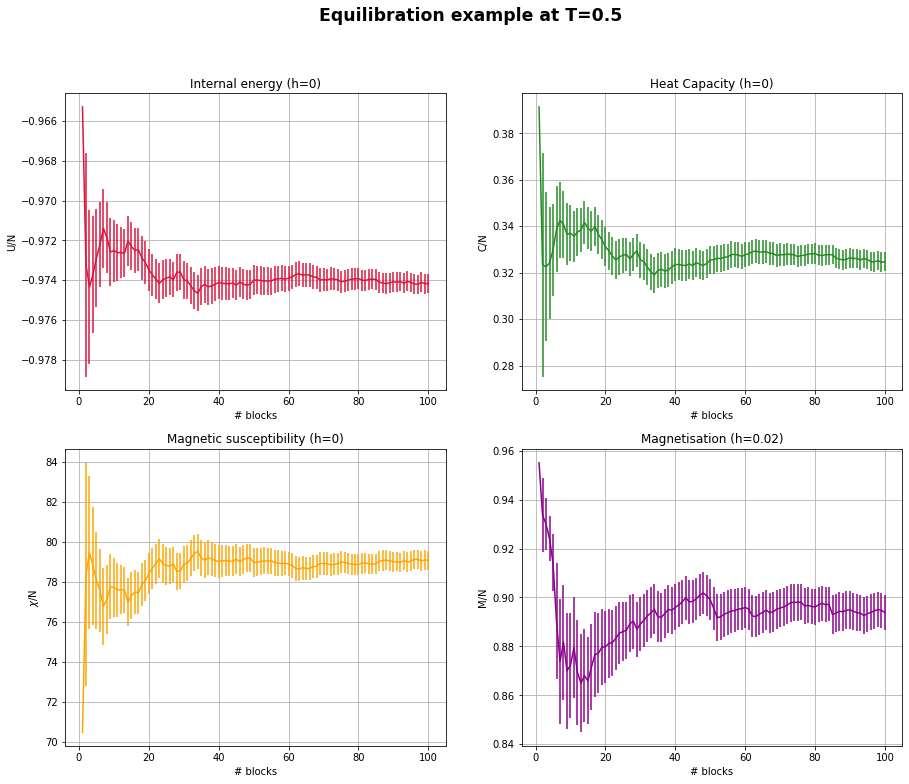

In [80]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

xe, ye, erre = np.loadtxt('Equilibration/output.ene.0', usecols=(0,2,3), unpack=True)
xc, yc, errc = np.loadtxt('Equilibration/output.heat.0', usecols=(0,2,3), unpack=True)
xx, yx, errx = np.loadtxt('Equilibration/output.chi.0', usecols=(0,2,3), unpack=True)
xm, ym, errm = np.loadtxt('Equilibration/output.mag.0', usecols=(0,2,3), unpack=True)

fig=plt.figure(figsize=(15, 12))
plt.suptitle("Equilibration example at T=0.5", size='xx-large', weight='bold')
plt.subplot(221)
plt.errorbar(xe, ye, yerr=erre, color='crimson')
plt.title('Internal energy (h=0)')
plt.ylabel('U')
plt.xlabel('# blocks')
plt.grid(True)

plt.subplot(222)
plt.errorbar(xc, yc, yerr=errc, color='forestgreen')
plt.title('Heat Capacity (h=0)')
plt.ylabel('C')
plt.xlabel('# blocks')
plt.grid(True)

plt.subplot(223)
plt.errorbar(xx, yx, yerr=errx, color='orange')
plt.title('Magnetic susceptibility (h=0)')
plt.ylabel('$\chi$')
plt.xlabel('# blocks')
plt.grid(True)

plt.subplot(224)
plt.errorbar(xm, ym, yerr=errm, color='darkmagenta')
plt.title('Magnetization (h=0.02)')
plt.ylabel('M')
plt.xlabel('# blocks')
plt.grid(True)

plt.show()

For the actual measurements, we are asked to express the observables in funtion of the temperature $T$. In order to do so, after having equilibrated the system, I considered $N_{blocks}=20$ with $L=10^4$, then picking just the last mean value with the rispective uncertainty for each $T \in [0.5;2]$.

Here a (commented) Python script allows to run the total simulation from scratch and some graphs of a previous simulations are depicted after that.

In [91]:
'''
import os
import numpy as np

#parameters:
Tmin=0.5
Tmax=2.0
nspin=50
J=1.0
h=0.0
nblock=20
nstep=10000
restart=0
equi=1
Metro=[1,0]

for metro in Metro:

    data=str(nspin)+"\n"+str(J)+"\n"+str(h)+"\n"+str(metro)+"\n"+str(nblock)+"\n"+str(nstep)+"\n"+str(restart)+"\n"+str(equi)+"\n\n  ReadInput >> temp; \n  ReadInput >> nspin; \n  ReadInput >> J; \n  ReadInput >> h; \n  ReadInput >> metro; \n  ReadInput >> nblk; \n  ReadInput >> nstep; \n  ReadInput >> restart; \n ReadInput >> equi;"

    #prepare "file environment"
    os.system("./clean.sh")
    if metro==1:
        os.system("rm Metropolis/output.*")
        oute=open("Metropolis/output.ene.temp", "w+")
        outc=open("Metropolis/output.heat.temp", "w+")
        outx=open("Metropolis/output.chi.temp", "w+")
    else:
        os.system("rm Gibbs/output.*")
        oute=open("Gibbs/output.ene.temp", "w+")
        outc=open("Gibbs/output.heat.temp", "w+")
        outx=open("Gibbs/output.chi.temp", "w+")

    #change input.dat in function of temperature
    temp=np.linspace(Tmin, Tmax, 50)
    for t in temp:
        indat=open("input.dat", "w")
        datatot=str(t)+"\n"+data
        indat.write(datatot)
        indat.close()
    #run the simulation at temperature t
        os.system("./Monte_Carlo_ISING_1D.exe")
    #upload data on output file
        me, erre = np.loadtxt("output.ene.0", skiprows=nblock-1, usecols=(2,3), unpack=True)
        dataout=str(t)+"\t"+str(me)+"\t"+str(erre)+"\n"
        oute.write(dataout)
        mc, errc = np.loadtxt("output.heat.0", skiprows=nblock-1, usecols=(2,3), unpack=True)
        dataout=str(t)+"\t"+str(mc)+"\t"+str(errc)+"\n"
        outc.write(dataout)
        mx, errx = np.loadtxt("output.chi.0", skiprows=nblock-1, usecols=(2,3), unpack=True)
        dataout=str(t)+"\t"+str(mx)+"\t"+str(errx)+"\n"
        outx.write(dataout)
    oute.close()
    outc.close()
    outx.close()

print ("Finished")
'''

Finished


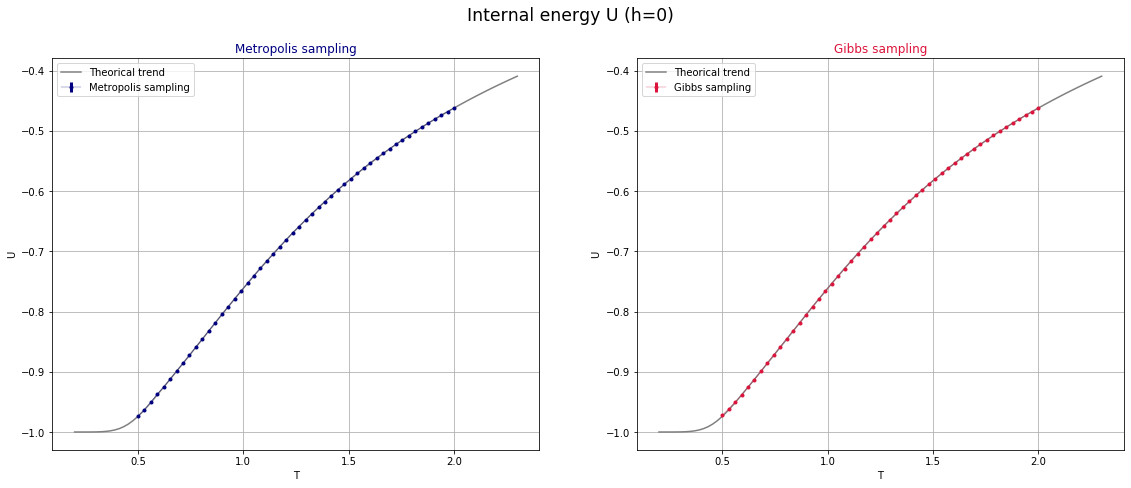

In [107]:
import numpy as np
import matplotlib.pyplot as plt

tM,eM,erreM = np.loadtxt("Metropolis/output.ene.temp", usecols=(0,1,2), unpack=True)
tG,eG,erreG =np.loadtxt("Gibbs/output.ene.temp", usecols=(0,1,2), unpack=True)

#theorical
points=100
T = np.linspace(0.2,2.3,num=points)
beta = 1/T
J = 1.0
Ns = 50
th = np.tanh(J/T)
thN= th**Ns
ch = 1/th
e = -J*( th + ch*thN )/( 1 + thN )
s=1.5
plt.figure(figsize=(6.4*s*2.0, 4.8*s))
plt.suptitle('Internal energy U (h=0)', size='xx-large')

#comparison with samplings
plt.subplot(121)
plt.xlabel('T')
plt.ylabel('U')
plt.errorbar(tM, eM, yerr=erreM,linewidth = 0.3, marker = '.', elinewidth = 3., label='Metropolis sampling', color='navy')
plt.title('Metropolis sampling', color='navy')
plt.plot(T, e, color='grey', label='Theorical trend')
plt.grid(True)
plt.legend()

plt.subplot(122)
plt.xlabel('T')
plt.ylabel('U')
plt.errorbar(tG, eG, yerr=erreG,linewidth = 0.3, marker = '.', elinewidth = 3., label='Gibbs sampling', color='crimson')
plt.title('Gibbs sampling', color='crimson')
plt.plot(T, e, color='grey', label='Theorical trend')
plt.grid(True)
plt.legend()

plt.show()

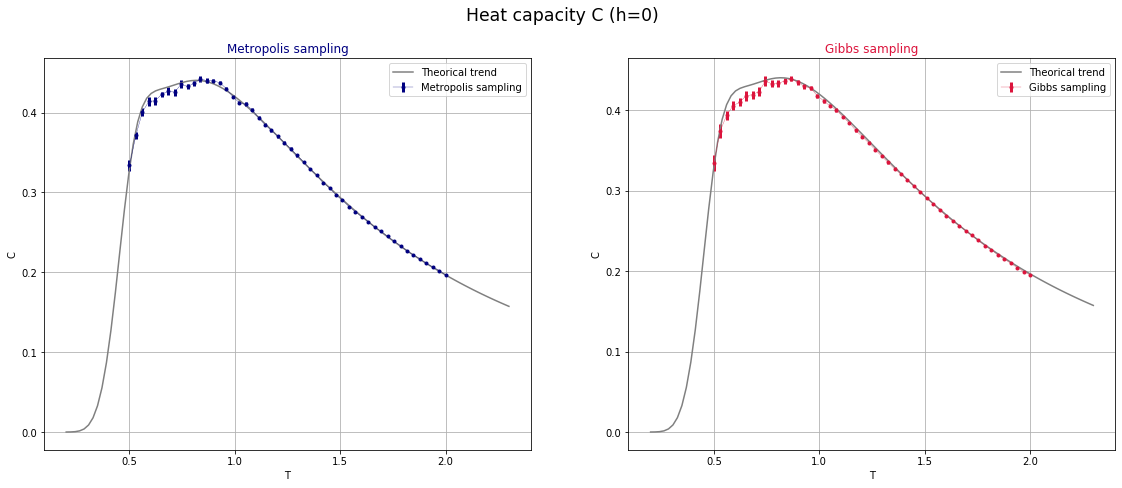

In [108]:
tM,eM,erreM = np.loadtxt("Metropolis/output.heat.temp", usecols=(0,1,2), unpack=True)
tG,eG,erreG =np.loadtxt("Gibbs/output.heat.temp", usecols=(0,1,2), unpack=True)

#theorical
heat=((beta*J)**2)*(((1+thN+(Ns-1)*(th**2)+(Ns-1)*(ch**2)*thN)/(1+thN))-Ns*((th+ch*thN)/(1+thN))**2)
s=1.5
plt.figure(figsize=(6.4*s*2.0, 4.8*s))
plt.suptitle('Heat capacity C (h=0)', size='xx-large')

#comparison with samplings
plt.subplot(121)
plt.xlabel('T')
plt.ylabel('C')
plt.errorbar(tM, eM, yerr=erreM,linewidth = 0.3, marker = '.', elinewidth = 3., label='Metropolis sampling', color='navy')
plt.title('Metropolis sampling', color='navy')
plt.plot(T, heat, color='grey', label='Theorical trend')
plt.grid(True)
plt.legend()

plt.subplot(122)
plt.xlabel('T')
plt.ylabel('C')
plt.errorbar(tG, eG, yerr=erreG,linewidth = 0.3, marker = '.', elinewidth = 3., label='Gibbs sampling', color='crimson')
plt.title('Gibbs sampling', color='crimson')
plt.plot(T, heat, color='grey', label='Theorical trend')
plt.grid(True)
plt.legend()

plt.show()

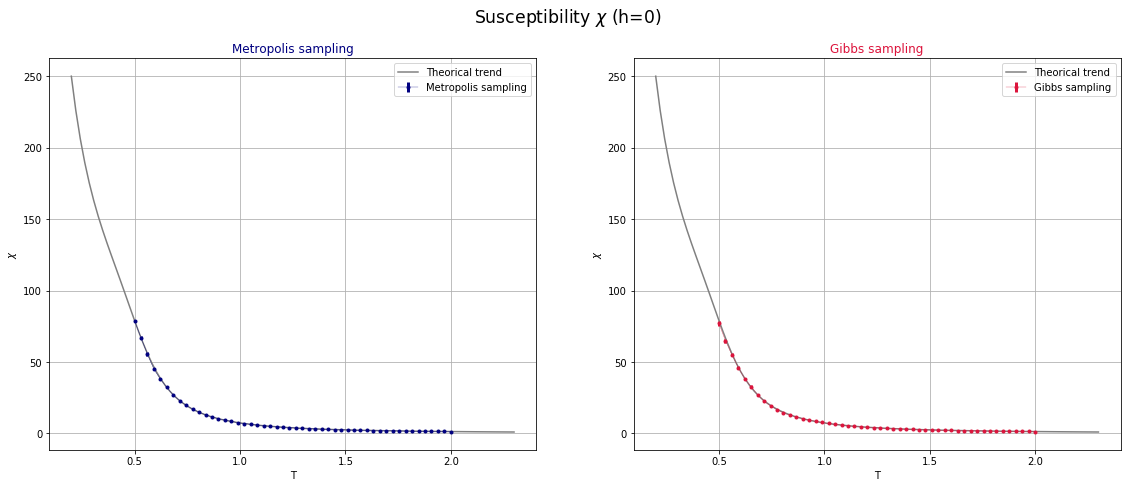

In [109]:
tM,eM,erreM = np.loadtxt("Metropolis/output.chi.temp", usecols=(0,1,2), unpack=True)
tG,eG,erreG =np.loadtxt("Gibbs/output.chi.temp", usecols=(0,1,2), unpack=True)

#theorical
X = beta*np.exp(2*beta*J)*(1-thN)/(1+thN)

s=1.5
plt.figure(figsize=(6.4*s*2.0, 4.8*s))
plt.suptitle('Susceptibility $\chi$ (h=0)', size='xx-large')

#comparison with samplings
plt.subplot(121)
plt.xlabel('T')
plt.ylabel('$\chi$')
plt.errorbar(tM, eM, yerr=erreM,linewidth = 0.3, marker = '.', elinewidth = 3., label='Metropolis sampling', color='navy')
plt.title('Metropolis sampling', color='navy')
plt.plot(T, X, color='grey', label='Theorical trend')
plt.grid(True)
plt.legend()

plt.subplot(122)
plt.xlabel('T')
plt.ylabel('$\chi$')
plt.errorbar(tG, eG, yerr=erreG,linewidth = 0.3, marker = '.', elinewidth = 3., label='Gibbs sampling', color='crimson')
plt.title('Gibbs sampling', color='crimson')
plt.plot(T, X, color='grey', label='Theorical trend')
plt.grid(True)
plt.legend()

plt.show()

In [103]:
'''
h=0.02
for metro in Metro:

    data=str(nspin)+"\n"+str(J)+"\n"+str(h)+"\n"+str(metro)+"\n"+str(nblock)+"\n"+str(nstep)+"\n"+str(restart)+"\n"+str(equi)+"\n\n  ReadInput >> temp; \n  ReadInput >> nspin; \n  ReadInput >> J; \n  ReadInput >> h; \n  ReadInput >> metro; \n  ReadInput >> nblk; \n  ReadInput >> nstep; \n  ReadInput >> restart; \n ReadInput >> equi;"

    #prepare "file environment"
    os.system("./clean.sh")
    if metro==1:
        os.system("rm Metropolis/output.mag.temp")
        outm=open("Metropolis/output.mag.temp", "w+")
    else:
        os.system("rm Gibbs/output.mag.temp")
        outm=open("Gibbs/output.mag.temp", "w+")

    #change input.dat in function of temperature
    temp=np.linspace(0.5, 2.0, 50)
    for t in temp:
        indat=open("input.dat", "w")
        datatot=str(t)+"\n"+data
        indat.write(datatot)
        indat.close()
    #run the simulation at temperature t
        os.system("./Monte_Carlo_ISING_1D.exe")
    #upload data on output file
        mm, errm = np.loadtxt("output.mag.0", skiprows=nblock-1, usecols=(2,3), unpack=True)
        dataout=str(t)+"\t"+str(mm)+"\t"+str(errm)+"\n"
        outm.write(dataout)
    outm.close()

print ("Finished")
'''

Finished


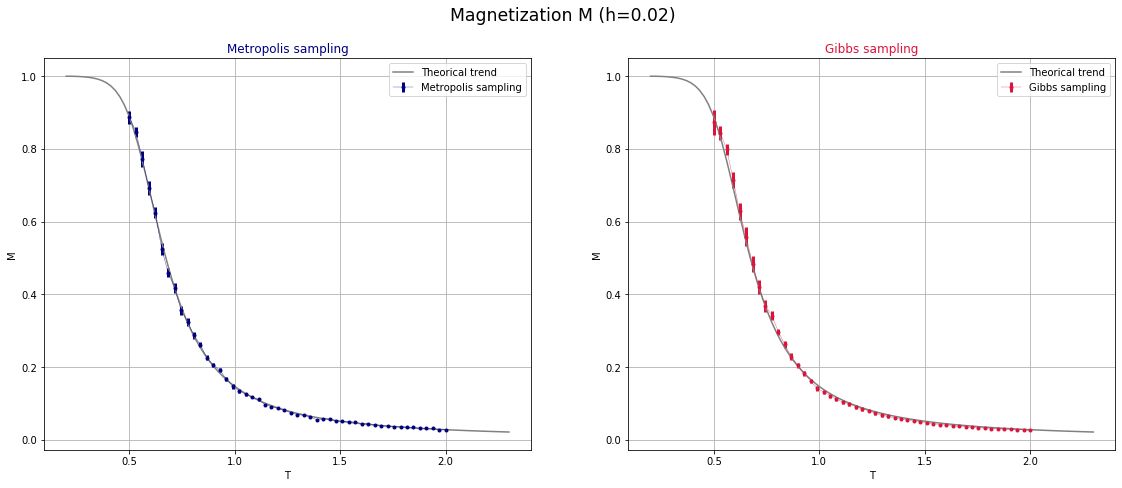

In [110]:
tM,eM,erreM = np.loadtxt("Metropolis/output.mag.temp", usecols=(0,1,2), unpack=True)
tG,eG,erreG =np.loadtxt("Gibbs/output.mag.temp", usecols=(0,1,2), unpack=True)

#theorical
h=0.02 #external field
b = 1/T

l1 = np.exp(b*J)*np.cosh(b*h)+np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
l2 = np.exp(b*J)*np.cosh(b*h)-np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
Z = l1**Ns + l2**Ns
M = (np.exp(b*J)*np.sinh(b*h)*((l1**(Ns-1))*(1+np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))) 
        + (l2**(Ns-1))*(1-np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J)))))/(Z)

s=1.5
plt.figure(figsize=(6.4*s*2.0, 4.8*s))
plt.suptitle('Magnetization M (h=0.02)', size='xx-large')

#comparison with samplings
plt.subplot(121)
plt.xlabel('T')
plt.ylabel('M')
plt.errorbar(tM, eM, yerr=erreM,linewidth = 0.3, marker = '.', elinewidth = 3., label='Metropolis sampling', color='navy')
plt.title('Metropolis sampling', color='navy')
plt.plot(T, M, color='grey', label='Theorical trend')
plt.grid(True)
plt.legend()

plt.subplot(122)
plt.xlabel('T')
plt.ylabel('M')
plt.errorbar(tG, eG, yerr=erreG,linewidth = 0.3, marker = '.', elinewidth = 3., label='Gibbs sampling', color='crimson')
plt.title('Gibbs sampling', color='crimson')
plt.plot(T, M, color='grey', label='Theorical trend')
plt.grid(True)
plt.legend()

plt.show()

All the graphs show that the simulation results confirm the theorical expectations very well, while we can not find considerable differences between the two sampling tecniques, meaning that both converge accurately. We can then notice that the error bars are often very small (sometimes we cannot even see them), probably it is also due to the equilibration phase that makes results little spread and uncertainties very small.